**Importing Libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files
from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img

**Download and Generate Data**

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d fantacher/neu-metal-surface-defects-data

 71% 41.0M/57.4M [00:03<00:02, 7.17MB/s]
100% 57.4M/57.4M [00:03<00:00, 19.0MB/s]


In [ ]:
! unzip '/content/neu-metal-surface-defects-data.zip'

Archive:  /content/neu-metal-surface-defects-data.zip
  inflating: NEU Metal Surface Defects Data/Thumbs.db  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_1.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_10.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_100.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_101.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_102.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_103.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_104.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_105.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_106.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_107.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_108.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_109.bmp  
  inflating: NEU Metal Surface Defects Data/test/Incl

In [ ]:
train_dir= '/content/NEU Metal Surface Defects Data/train'
test_dir= '/content/NEU Metal Surface Defects Data/test'
val_dir= '/content/NEU Metal Surface Defects Data/valid'
print("Inclusion Defect")
print("Training Images:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Images:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Images:",len(os.listdir(val_dir+'/'+'Inclusion')))

Inclusion Defect
Training Images: 276
Testing Images: 12
Validation Images: 12


Data consists of 6 classes of data as Training, Test and Validation with 276,12 and 12 images respectively.

**Data Preprocessing**

In [ ]:
train_image_gen= ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_image_gen= ImageDataGenerator(rescale=1./225)

def data_generator(q):
    train_generator= train_image_gen.flow_from_directory(
        train_dir,
        target_size= (200,200),
        batch_size= 10,
        class_mode= 'categorical')
    
    valid_generator= test_image_gen.flow_from_directory(
        val_dir,
        target_size= (200,200),
        batch_size= 10,
        class_mode= 'categorical')
    if q==1:
      return train_generator
    else:
      return valid_generator




**Define CNN Architecture**

In [ ]:
def create_model(input_shape,optimizer):
  model= tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(2,2), activation='relu', input_shape= input_shape),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(6, activation='softmax')
    ])
  model.compile(loss='categorical_crossentropy',
              optimizer= optimizer,
              metrics=['accuracy'])
  return model

In [ ]:
model = create_model((200,200,3),'sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0

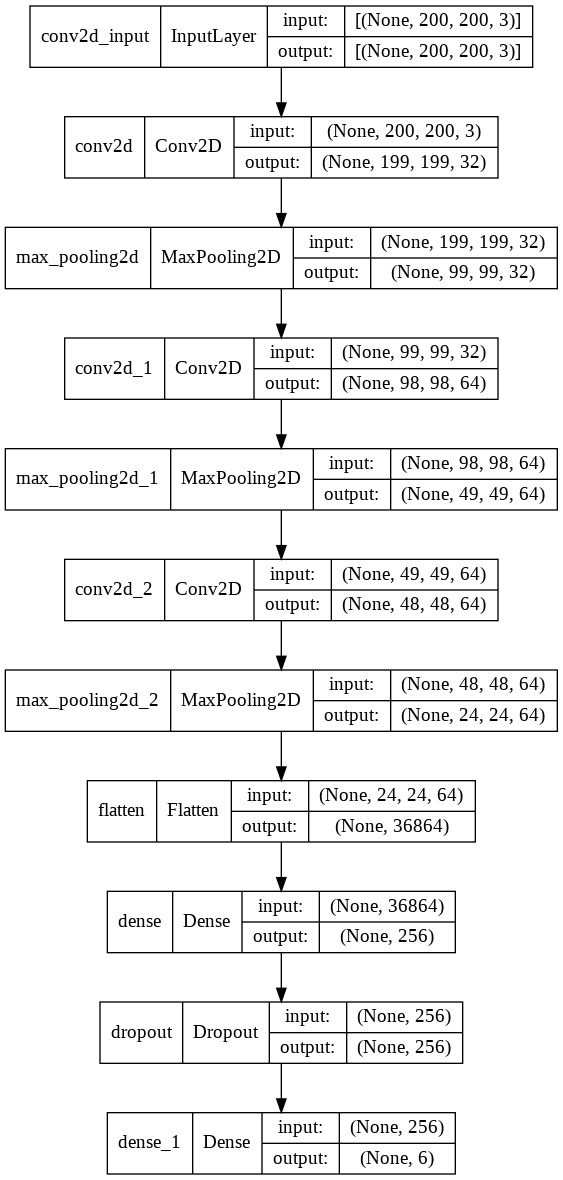

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='cnn_architecture.png',
    show_shapes=True
)

In [ ]:
def train_model(batch_size,epoch):
  history = model.fit(data_generator(1),
                      batch_size = batch_size,
                      epochs=epoch,
                      validation_data=data_generator(2),
                      #callbacks=[callbacks],
                      verbose=1, shuffle=True)
  return history

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Epoch 1/20
166/166 [==============================] - 37s 135ms/step - loss: 1.7057 - accuracy: 0.2295 - val_loss: 1.5759 - val_accuracy: 0.3472
Epoch 2/20
166/166 [==============================] - 14s 86ms/step - loss: 1.5218 - accuracy: 0.3937 - val_loss: 1.3496 - val_accuracy: 0.4583
Epoch 3/20
166/166 [==============================] - 14s 87ms/step - loss: 1.3563 - accuracy: 0.4807 - val_loss: 1.1050 - val_accuracy: 0.7500
Epoch 4/20
166/166 [==============================] - 14s 87ms/step - loss: 1.2530 - accuracy: 0.5127 - val_loss: 1.6360 - val_accuracy: 0.3611
Epoch 5/20
166/166 [==============================] - 14s 87ms/step - loss: 1.1589 - accuracy: 0.5664 - val_loss: 0.8649 - val_accuracy: 0.7917
Epoch 6/20
166/166 [==============================] - 16s 94ms/step - loss: 1.0658 - accuracy: 0.6063 - val_loss: 1

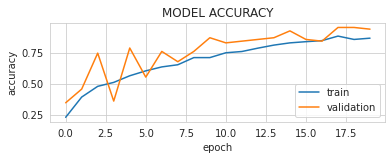


Best Validation Accuracy: 0.9583


<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_result(history):
  #accuracy
  history_df= pd.DataFrame(history.history)
  sns.set_style('whitegrid')
  plt.subplot(211)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("MODEL ACCURACY")
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','validation'],loc='lower right')
  plt.show()
  plt.savefig('model_accuracy.png')
  print(("\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_accuracy'].max()))
  #loss
  sns.set_style('whitegrid')
  plt.subplot(212)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("LOSS CURVE")
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','validation'],loc='upper right')
  plt.show()
  plt.savefig('loss_curve.png')
  print(("\nBest Validation Loss: {:0.4f}")\
      .format(history_df['val_loss'].min()))
  
plot_result(train_model(32,20))  

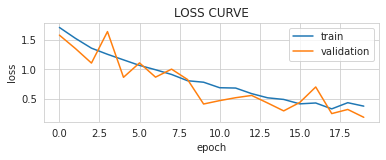


Best Validation Loss: 0.1900


<Figure size 432x288 with 0 Axes>

**Test Results**

In [ ]:
def load_dataset(path):
  data = load_files(path)
  files= np.array(data['filenames'])
  targets= np.array(data['target'])
  target_labels=np.array(data['target_names'])
  return files,targets,target_labels

X_test,y_test,target_labels= load_dataset(test_dir)
no_of_class= len(target_labels)
no_of_class

6

In [ ]:
# model=tf.keras.models.load_model('/content/Metal_surface_defect_detector.h5')
model.save('Metal_surface_defect_detector.h5')

In [ ]:
!zip "/content/quality_control_model.zip" "/content/Metal_surface_defect_detector.h5"

updating: content/Metal_surface_defect_detector.h5 (deflated 8%)


In [ ]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_test = np.array(convert_image_to_array(X_test))
X_test = X_test.astype('float32')/255
y_test = np_utils.to_categorical(y_test,no_of_class)
print('Test set shape : ',X_test.shape)

Test set shape :  (72, 200, 200, 3)


**Prediction**

Samples classified correctly are shown <font color='green'>**green**</font>, otherwise <font color='red'>**red**</font>.

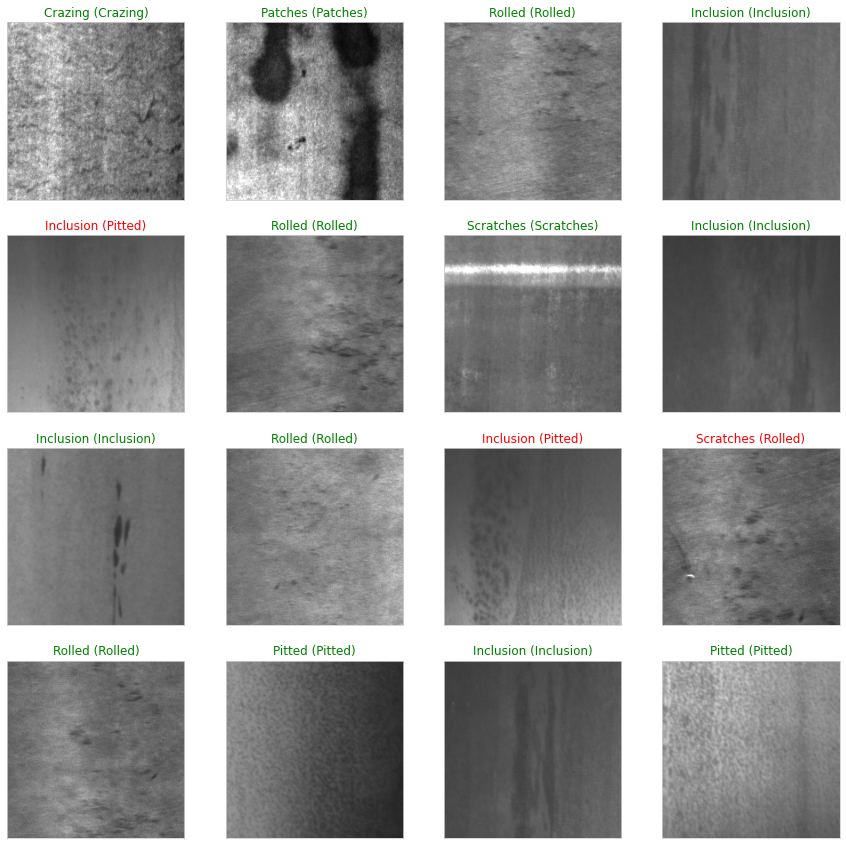

In [ ]:
prediction= model.predict(X_test)
fig = plt.figure(figsize=(15, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(prediction[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
plt.savefig('results.png')